<a href="https://colab.research.google.com/github/jainprashant03/ML_projects/blob/Tutorials%40Udemy/Workbook_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random
N=500 #number of users
d=10  #number of ads
ads_selected=[] #list of selected ads over 10000 users
numbers_of_rewards_1=[0]*d  #list of 10 ad
numbers_of_rewards_0=[0]*d  #10, each per ad
total_reward=0 #sum of rewards at each round
#for loop the users
for n in range(0,N):
  ad=0
  max_random=0
  #for loop the ads
  for i in range(0,d):
    random_beta=random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
    if(random_beta>max_random):
      max_random=random_beta
      ad=i
  #ad with maximum random_beta selected per user
  ads_selected.append(ad)
  reward=dataset.values[n,ad]
  #update the number of rewards, depends on reward
  if(reward == 1):
    numbers_of_rewards_1[ad]+=1
  else:
    numbers_of_rewards_0[ad]+=1
  total_reward+=reward

## Visualising the results - Histogram

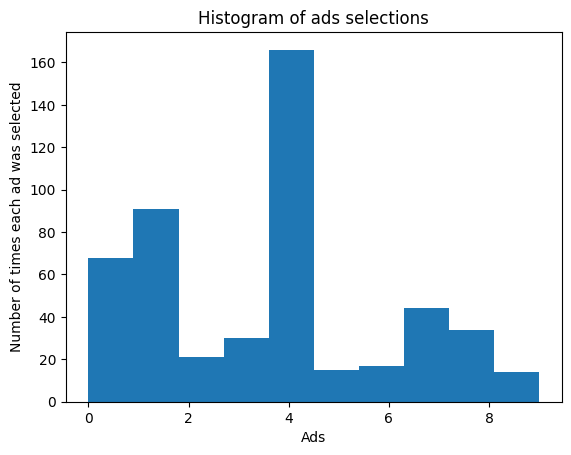

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()